<a href="https://colab.research.google.com/github/MartinBruchon/MartinBruchon/blob/main/pokedex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.vision.all import *
from lxml import etree
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
!unzip train.zip
!unzip valid.zip

Archive:  train.zip
   creating: train/
   creating: train/Arbok/
  inflating: train/Arbok/00000002.jpg  
  inflating: train/Arbok/00000003.png  
  inflating: train/Arbok/00000005.png  
  inflating: train/Arbok/00000006.png  
  inflating: train/Arbok/00000008.jpg  
  inflating: train/Arbok/00000009.png  
  inflating: train/Arbok/00000012.png  
  inflating: train/Arbok/00000013.jpg  
  inflating: train/Arbok/00000014.png  
  inflating: train/Arbok/00000015.png  
  inflating: train/Arbok/00000016.jpg  
  inflating: train/Arbok/00000017.jpg  
  inflating: train/Arbok/00000018.jpg  
  inflating: train/Arbok/00000019.png  
  inflating: train/Arbok/00000020.png  
  inflating: train/Arbok/00000025.jpg  
  inflating: train/Arbok/00000026.jpg  
  inflating: train/Arbok/00000034.png  
  inflating: train/Arbok/00000035.png  
  inflating: train/Arbok/00000037.png  
  inflating: train/Arbok/00000038.png  
  inflating: train/Arbok/00000039.png  
  inflating: train/Arbok/00000042.png  
  inflating: t

In [ ]:
def dirparser(path):
    path = Path(path)
    output = []
    for folders in os.listdir(path):
        for fname in os.listdir(path / folders):
            _, ext = fname.split('.')
            if ext in ['png', 'PNG', 'jpg', 'JPG', 'jpeg', 'JPEG']:
                img = Image.open(path / folders / fname).convert('RGB')
                output.append((np.array(img), folders))
    return output

In [ ]:
train_set = dirparser("./train")
valid_set = dirparser("./valid")

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


(<matplotlib.image.AxesImage at 0x7faf8dad28b0>, 'Arbok')

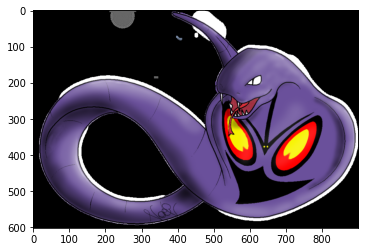

In [ ]:
x, y = valid_set[1]
plt.imshow(x), y

In [ ]:
val_idx = list(range(len(train_set), len(train_set) + len(valid_set)))

dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_x = ItemGetter(0),
                   get_y = ItemGetter(1),
                   splitter=IndexSplitter(val_idx),
                   item_tfms=[Resize(512, method='squish')],
                   batch_tfms=[*aug_transforms(size=512, 
                                               max_rotate=20, 
                                               max_zoom=1.0,
                                               max_lighting=0.25), 
                               Normalize.from_stats(*imagenet_stats)])               


dls = dblock.dataloaders(train_set + valid_set, bs=32, shuffle_train=True)

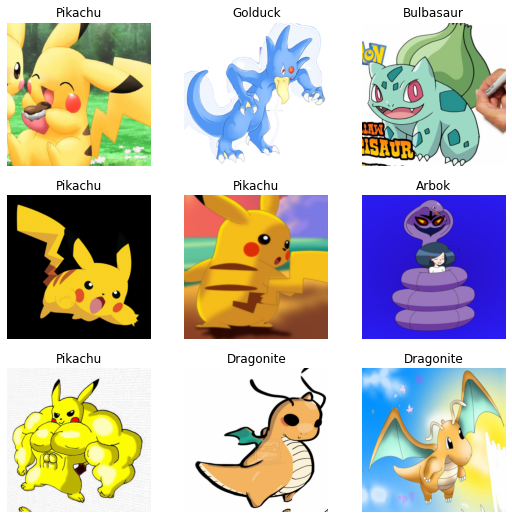

In [ ]:
dls.train.show_batch()

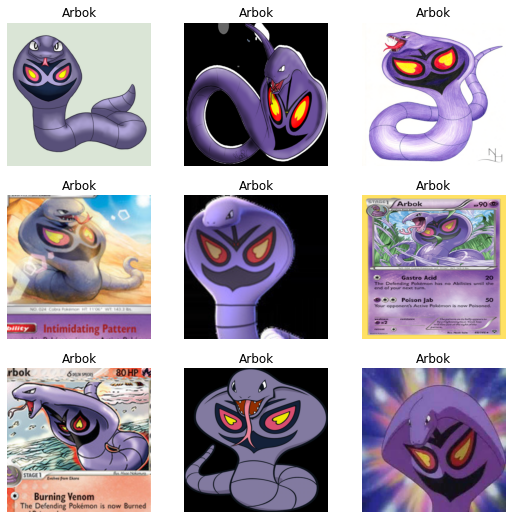

In [ ]:
dls.valid.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet18, 
                    loss_func=CrossEntropyLossFlat(), 
                    metrics=accuracy)

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(30, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.305206,0.109536,0.944751,00:17


epoch,train_loss,valid_loss,accuracy,time
0,0.185433,0.088731,0.955801,00:18
1,0.118584,0.091436,0.961326,00:18
2,0.079492,0.048291,0.983425,00:17
3,0.060315,0.030618,0.988950,00:17
4,0.046688,0.031297,0.988950,00:18
5,0.039143,0.068192,0.977901,00:17
6,0.041088,0.029046,0.983425,00:18
7,0.037045,0.053044,0.983425,00:19
8,0.033720,0.026718,0.988950,00:18
9,0.040370,0.044696,0.988950,00:18


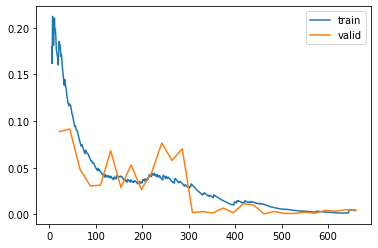

In [ ]:
learn.recorder.plot_loss()

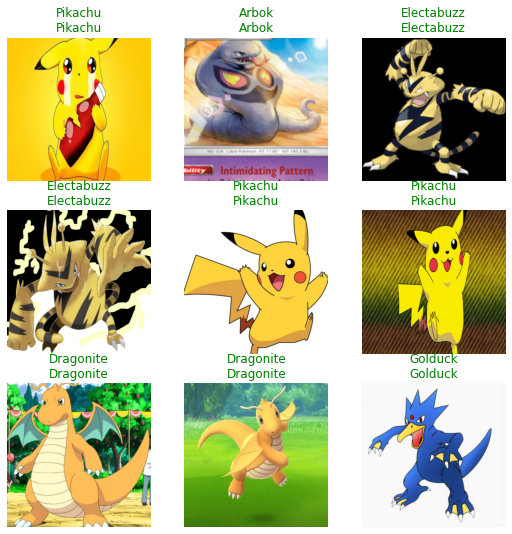

In [ ]:
learn.show_results()

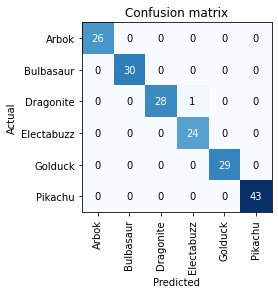

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

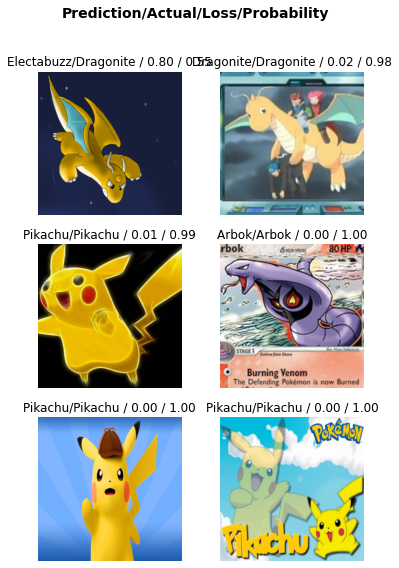

In [ ]:
interp.plot_top_losses(6, nrows=3)

In [ ]:
learn.save('./test')